> ### **Dataset Information**
> Dataset source: [UCI Heart Disease Dataset](https://archive.ics.uci.edu/dataset/45/heart+disease)
> - The database contains **76 attributes**, but all published experiments use a **subset of 14**.  
> - The **Cleveland database** is the one most commonly used in ML research.  
> - The **goal** field indicates **heart disease presence**:
>   - `0` = no disease  
>   - `1, 2, 3, 4` = disease present  
> - Most studies simplify this into **binary classification**:  
>   - 0 → No Heart Disease  
>   - 1 → Heart Disease Present  
> - Personally identifiable information (like names/SSNs) has been **removed** and replaced with dummy values.  
> - The **"processed" file** corresponds to the **Cleveland dataset**, which we’ll use.  
>
> ---
>
> ### **Data Cleaning Plan**
>
> #### 1. Replace or Drop Missing Values
> - In this dataset, missing values are represented by `?`.  
> - We’ll replace them with `NaN` and decide whether to drop or impute them later.  
>   ```python
>   df.replace('?', pd.NA, inplace=True)
>   df = df.dropna()
>   ```
>   *Ensures all numeric data is valid before processing.*
>
>
> #### 2. Convert All Columns to Correct Data Types
> - After replacing `?`, columns may still be stored as `object`.
>
>
> #### 3. Simplify the Target Variable (Binary Classification)
> - The `target` column values range from 0–4.  
> - Convert to a **binary classification**:  
>   ```python
>   df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)
>   ```
>   *Groups all levels of heart disease into a single “disease present” category.*
>
>
> #### 4. Remove Duplicate Records
> - Remove duplicates to prevent bias.  
>   ```python
>   df = df.drop_duplicates()
>   ```
>
>
> #### 5. Detect Outliers or Unrealistic Values
> - Use summary stats or boxplots to spot extreme values (e.g., cholesterol = 0).  
>   ```python
>   df.describe()
>   ```
>
>

In [2]:
#Import required libraries
import pandas as pd
import numpy as np

#defining column names
cols = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

df = pd.read_csv("data/processed.cleveland.data", names=cols, na_values='?')

print("Preview of raw data:")
print(df.shape)
df.head()

Preview of raw data:
(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
# 1. Replace or Drop Missing Values
print("missing values before cleaning:")
print(df.isnull().sum(), '\n')

#dropping rows with missing values for simplicity
df = df.dropna()
print("missing values after cleaning:")
print(df.isnull().sum())

missing values before cleaning:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64 

missing values after cleaning:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:
# 2. Checking data types to ensure no object types in numeric columns
print("\nData types per column:")
print(df.dtypes)


Data types per column:
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object


In [5]:
# 3. Simplify the Target Variable (Binary Classification)
# original: 0 = no disease, 1-4 = presence of disease; convert to 0 = no disease, 1 = disease
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

print("\nvalue counts for target column:")
print(df['target'].value_counts())


value counts for target column:
target
0    160
1    137
Name: count, dtype: int64


In [6]:
# 4. Remove Duplicate Records

df = df.drop_duplicates()
print("\nduplicate records after removal:")
print(df.duplicated().sum())


duplicate records after removal:
0


          Proportion of Outliers
age                     0.000000
sex                     0.000000
cp                      0.077441
trestbps                0.030303
chol                    0.016835
fbs                     0.144781
restecg                 0.000000
thalach                 0.003367
exang                   0.000000
oldpeak                 0.016835
slope                   0.000000
ca                      0.067340
thal                    0.000000
target                  0.000000


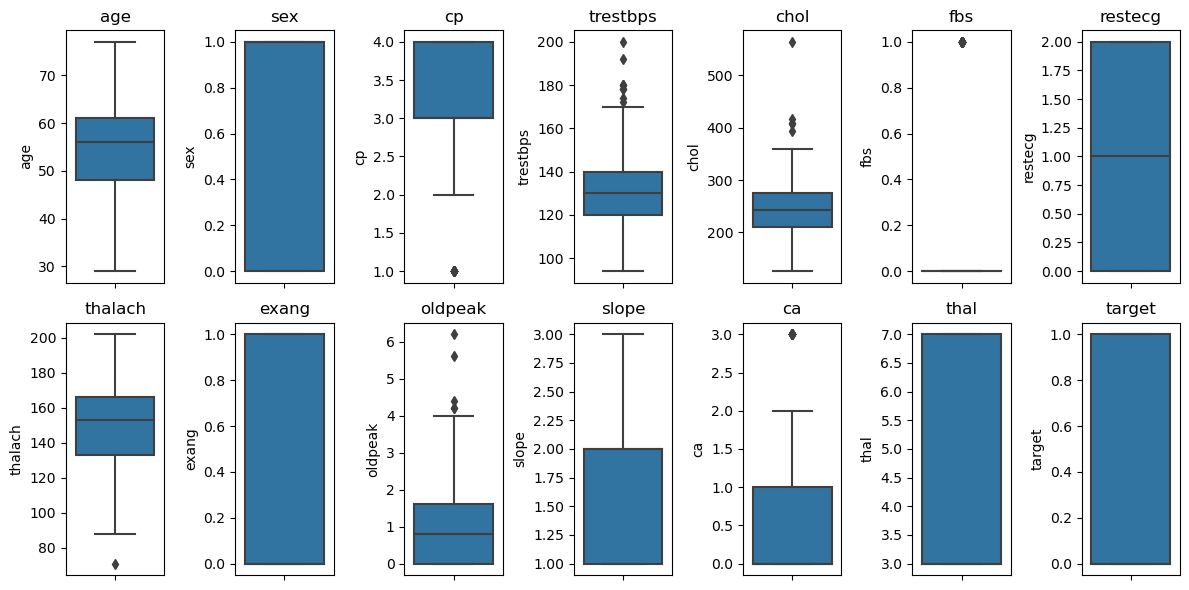

In [7]:
# 5. Detect Outliers or Unrealistic Values

import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

outliers = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    proportion = outlier_count / len(df)

    outliers[col] = proportion

outlier_summary = pd.DataFrame.from_dict(outliers, orient='index', columns=['Proportion of Outliers'])
print(outlier_summary)

# visualizing outliers w/ boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.columns, 1):
    plt.subplot(2, (len(df.columns)+1)//2, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


### **Outlier Investigation**
These box plots help us analyze where some extreme outliers may lie, leading us to possibly investigate further.

- `fbs`: classified as T/F based on if the patient's fasting blood sugar is > 120 mg/dl.
    - `fbs` has 1 prominent outlier, but upon investigation, it is actually very plausible. `fbs` is classified as T/F based on the patient's fasting blood sugar level. Since the feature was converted to binary classification, it's clear the outlier represents the few patients who were marked as True for `fbs`.

- `ca`: the number of major vessels (0-3) colored by flourosopy
    - Since the range is 0-3 inclusive, the outlier of 3 makes sense. It may be somewhat rare but appears multiple times in the dataset.

- `chol`: serum cholestoral in mg/dl
    - The `chol` levels vary greatly in the dataset, with several high instances 200+. However, there is 1 outlier of 564 mg/dl that stands out in the plot. While this value is much higher than expected, it is not necessarily suspicious and completely possible as a cholestoral level.

- `cp`: an ordinal data feature that represents chest pain rankings
    - Since `cp` is based on a scale 1-4, the outlier of 1 makes sense and is likely relevant.

---

After analyzing these prominent outliers, it's clear that none are necessarily suspicious to our dataset. All of the outliers that we evaluated are extremely plausible and likely relevant to our models to use. **Therefore, no additional outliers are to be removed at this point.**

In [8]:
# 6. Final sanity checks

print("\nfinal cleaned dataset info:")
display(df.info)

print("\nmissing values after cleaning:")
print(df.isnull().sum())

print("\ndata cleaning is complete. ready for EDA & feature engineering.")


final cleaned dataset info:


<bound method DataFrame.info of       age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   

     slope   ca  th


missing values after cleaning:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

data cleaning is complete. ready for EDA & feature engineering.


> ###  **Exploratory Data Analysis (EDA) Plan**
>
> After cleaning the data, the next step is to explore and understand the relationships between variables. The main goal is to identify which features might influence heart disease and to visualize overall data patterns.
>
> ---
>
> #### 1. Understand Basic Statistics
> - Use `df.describe()` to get a summary of all numeric columns.
> - Check central tendencies (mean, median) and dispersion (std, min, max).
> - Look for unusual ranges or outliers (e.g., cholesterol or age values).
>
>
> #### 2. Visualize Feature Distributions
> - Use histograms to show the spread of key continuous variables:  
>   - Age (`age`)  
>   - Resting blood pressure (`trestbps`)  
>   - Cholesterol (`chol`)  
>   - Max heart rate achieved (`thalach`)  
>   - ST depression (`oldpeak`)
>
> - Example:
>   ```python
>   import matplotlib.pyplot as plt
>   df.hist(figsize=(12,8), bins=20, color='skyblue')
>   plt.suptitle('Feature Distributions', fontsize=16)
>   plt.show()
>   ```
> - Helps detect skewness, outliers, and the general data shape.
>
>
> #### 3. Analyze Correlations Between Features
> - Compute correlation matrix:  
>   ```python
>   corr = df.corr()
>   ```
> - Plot with a heatmap:
>   ```python
>   import seaborn as sns
>   plt.figure(figsize=(10,8))
>   sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
>   plt.title('Correlation Heatmap')
>   plt.show()
>   ```
> - Pay special attention to how features like `thalach`, `oldpeak`, and `cp` relate to `target`.
>
>
> #### 4. Feature Distributions: Heart Disease vs No Disease
> - Split data by `target` (0 = no disease, 1 = disease) and compare averages:
>   ```python
>   df.groupby('target').mean()
>   ```
> - Use boxplots to visualize differences:
>   ```python
>   sns.boxplot(x='target', y='age', data=df)
>   sns.boxplot(x='target', y='chol', data=df)
>   ```
> - This helps reveal which variables differ significantly between patients with and without heart disease.
>
>
> #### 5. Visualize Categorical Features
> - Count plots for categorical columns like:
>   - Chest pain type (`cp`)
>   - Resting ECG results (`restecg`)
>   - Slope of ST segment (`slope`)
> - Example:
>   ```python
>   sns.countplot(x='cp', hue='target', data=df)
>   plt.title('Chest Pain Type vs Heart Disease')
>   ```
> - Highlights which categorical patterns may indicate higher disease risk.
>
>
> #### 6. Check Relationships Between Continuous Variables
> - Scatter plots can show linear or non-linear patterns:
>   ```python
>   sns.scatterplot(x='age', y='thalach', hue='target', data=df)
>   plt.title('Max Heart Rate vs Age (Colored by Disease)')
>   ```
> - Look for clusters or separations between the two `target` groups.
>

In [9]:
# 1. Understand Basic Statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


### **Summary Statistics Overview**

Using `df.describe()`, we can observe the main statistical characteristics of each feature in the dataset.

1. Age
    - **Range:** 29–77 years old  
    - **Average:** ~54.5 years  
    - Indicates that most patients in the dataset are middle-aged to older adults.

2. Sex
    - Encoded as `0 = female`, `1 = male`  
    - **Mean:** 0.68 → roughly **68% of patients are male**.

3. Chest Pain Type (`cp`)
    - Values range from 1–4 (different chest pain categories).  
    - **Mean ~3.16**, indicating most patients report “asymptomatic” or “non-anginal” pain types.

4. Resting Blood Pressure (`trestbps`)
    - **Range:** 94–200 mm Hg  
    - **Average:** 131.7 mm Hg — within the upper normal range but includes hypertensive cases.

5. Cholesterol (`chol`)
    - **Range:** 126–564 mg/dl  
    - **Mean:** ~247 mg/dl — slightly high; many patients show elevated cholesterol.

6. Fasting Blood Sugar (`fbs`)
    - Binary (1 = >120 mg/dl).  
    - **Mean:** 0.145 → ~14.5% have high fasting blood sugar.

7. Resting ECG Results (`restecg`)
    - **Range:** 0–2  
    - **Mean:** ~1.0, suggesting normal ECG in most cases.

8. Max Heart Rate Achieved (`thalach`)
    - **Range:** 71–202 bpm  
    - **Mean:** ~150 bpm — higher values generally indicate healthier cardiovascular response.

9. Exercise-Induced Angina (`exang`)
    - Binary (1 = yes).  
    - **Mean:** 0.33 → about **one-third** experience angina during exercise.

10. ST Depression (`oldpeak`)
    - **Range:** 0.0–6.2  
    - **Mean:** ~1.06 → reflects moderate ST segment changes (linked to ischemia severity).

11. Slope of Peak Exercise ST Segment (`slope`)
    - **Range:** 1–3  
    - **Mean:** 1.6 → most patients have an “upsloping” or “flat” ST segment response.

12. Number of Major Vessels Colored by Fluoroscopy (`ca`)
    - **Range:** 0–3  
    - **Mean:** 0.68 → most patients have few or no major vessels with blockage.

13. Thalassemia (`thal`)
    - **Values:** 3, 6, 7 represent normal, fixed defect, reversible defect.  
    - **Mean:** 4.73 — distribution leans toward normal and fixed defects.

14. Target (Heart Disease)
    - **0 = No Disease**, **1 = Disease Present**  
    - **Mean:** 0.46 → roughly **46% of patients** have heart disease.

---

**Interpretation Summary**
- The dataset is well-balanced between patients with and without heart disease.  
- Most are middle-aged men with moderately elevated cholesterol and blood pressure.  
- Features like `thalach`, `oldpeak`, `cp`, and `ca` show strong variation, likely key predictors in modeling.

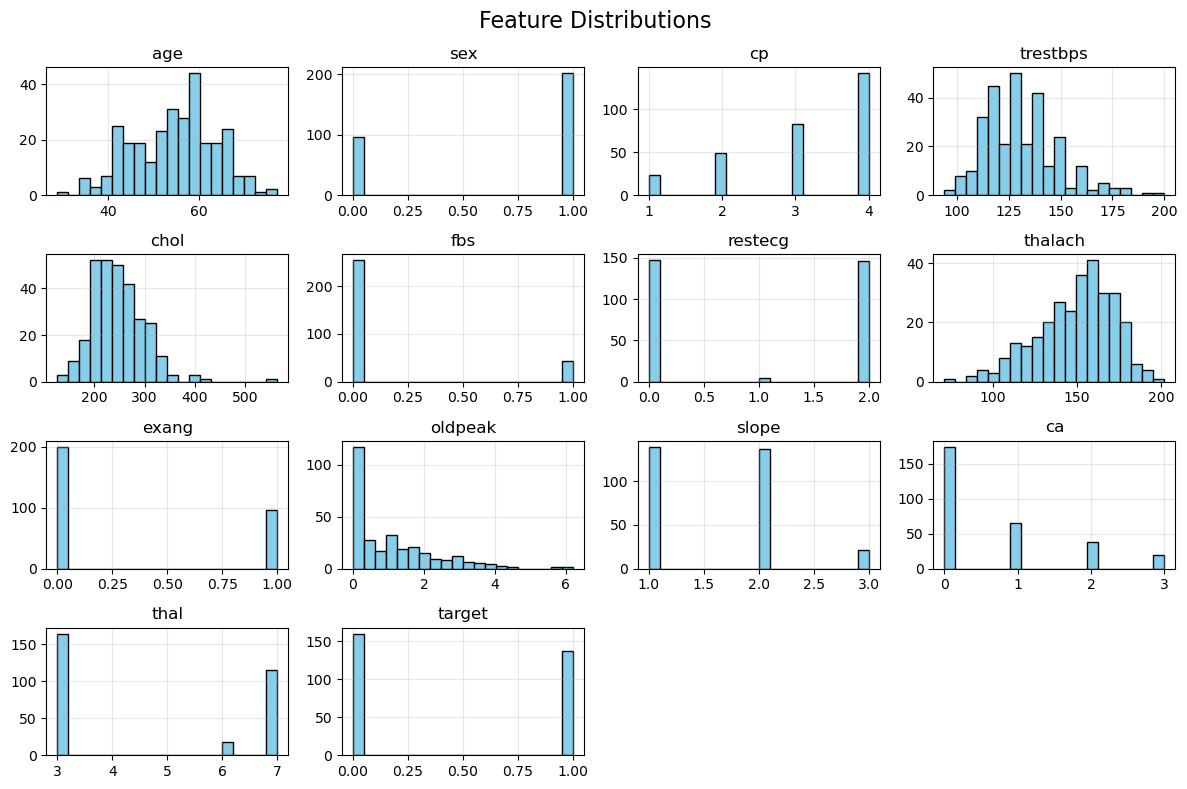

In [10]:
# 2. Visualize Feature Distributions
# - Use histograms to show the spread of key continuous variables:  
#   - Age (`age`)  
#   - Resting blood pressure (`trestbps`)  
#   - Cholesterol (`chol`)  
#   - Max heart rate achieved (`thalach`)  
#   - ST depression (`oldpeak`)

import matplotlib.pyplot as plt
df.hist(figsize=(12,8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 1])
for ax in plt.gcf().axes:
    ax.grid(alpha=0.3)
plt.show()

### **Feature Distribution Analysis (Histograms)**

The histograms above visualize the distribution of all 14 features in the dataset.
This helps us identify skewed data, outliers, and potential normalization needs before modeling.

1. Age
    - Roughly normal distribution centered around **50–60 years old**.  
    - Indicates most patients are middle-aged or older, consistent with typical heart disease demographics.

2. Sex
    - Binary distribution with more values at `1` → **majority male (≈68%)**.

3. Chest Pain Type (`cp`)
    - Four distinct categories with peaks at 3 and 4 → most patients report **asymptomatic** or **non-anginal** pain.

4. Resting Blood Pressure (`trestbps`)
    - Slight right skew, centered around **120–140 mmHg**.  
    - A few outliers near 180–200 indicate potential hypertension cases.

5. Cholesterol (`chol`)
    - Strong right skew; most values fall between **200–300 mg/dL** but extend up to **564 mg/dL**, showing outliers.

6. Fasting Blood Sugar (`fbs`)
    - Binary distribution with most values at `0` → **few patients** have fasting blood sugar > 120 mg/dL.

7. Resting ECG Results (`restecg`)
    - Categorical (0–2), with the majority around **0 and 1**, meaning mostly normal or slight abnormalities.

8. Max Heart Rate Achieved (`thalach`)
    - Bell-shaped distribution centered near **150 bpm**.  
    - Patients achieving higher max HR generally show healthier cardiac response.

9. Exercise-Induced Angina (`exang`)
    - Binary: majority `0` → most patients **did not experience angina** during exercise.

10. ST Depression (`oldpeak`)
    - Right-skewed distribution with many near `0.0–1.0`.  
    - Outliers above 4 may indicate **severe ischemic changes**.

11. Slope of Peak Exercise ST Segment (`slope`)
    - Discrete variable (1–3) with most values around 1–2 → **flat or upsloping responses** are common.

12. Number of Major Vessels (`ca`)
    - Most patients have `0` or `1` vessels colored, implying **few severe blockages**.

13. Thalassemia (`thal`)
    - Clustered at **3, 6, and 7**, reflecting **normal**, **fixed defect**, and **reversible defect** categories.

14. Target (Heart Disease)
    - Binary distribution that is **fairly balanced** (160 no disease vs. 137 disease).  
    - Confirms the dataset is suitable for **binary classification**.

---

**Insights:**
- Most features are numerical and continuous, with a few binary or categorical features (`sex`, `fbs`, `exang`, `cp`, etc.).  
- Several features (`chol`, `oldpeak`) are skewed, so **scaling or normalization** may help later models.  
- Clear separation in `target` values shows a balanced dataset, ideal for predictive modeling.

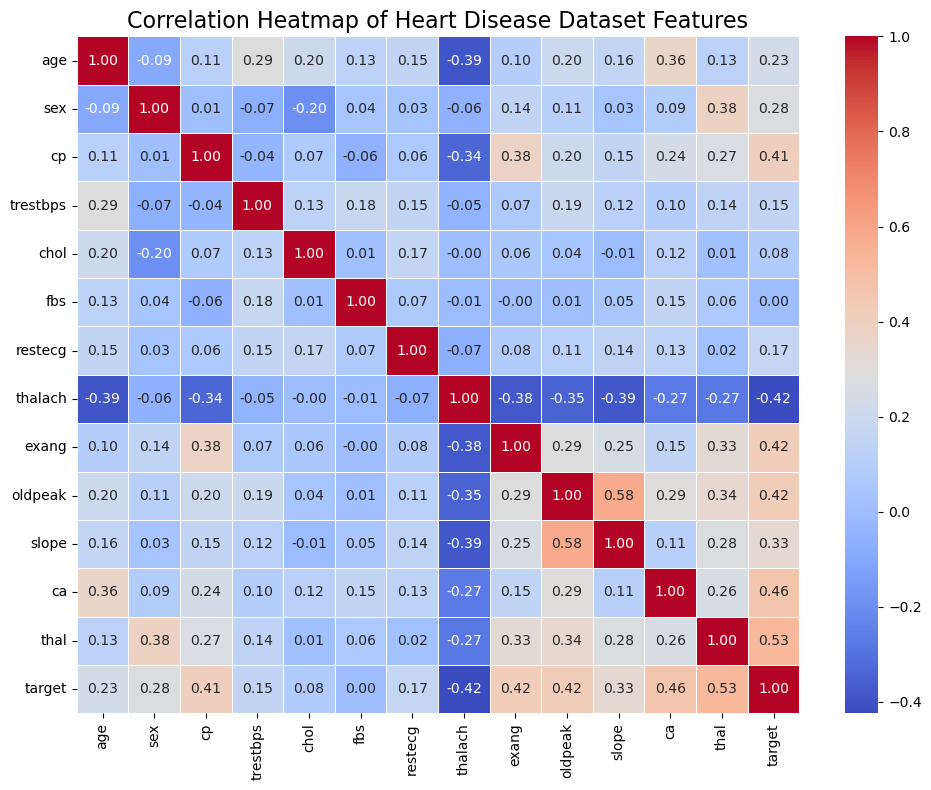

In [11]:
# 3. Analyze Correlations Between Features
corr = df.corr()
corr

import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Heart Disease Dataset Features', fontsize=16)
plt.tight_layout()
plt.show()

###  **Correlation Heatmap Interpretation**

The heatmap above visualizes the relationships between all features in the Heart Disease dataset.  
Red cells indicate **positive correlations**, while blue cells indicate **negative correlations**.  
The intensity of color shows how strong the relationship is.

---

**Key Insights Related to Heart Disease (`target`):**
- **`thal` (0.53)** → Strongest positive correlation. Certain thalassemia defects are strongly associated with heart disease.  
- **`ca` (0.46)** → More major vessels colored by fluoroscopy = higher heart disease likelihood.  
- **`oldpeak` (0.42)** → Greater ST depression indicates more severe cardiac abnormality.  
- **`exang` (0.42)** → Exercise-induced angina positively linked to disease.  
- **`cp` (0.41)** → Chest pain type also correlates with disease presence (especially asymptomatic pain types).  
- **`thalach` (-0.42)** → Negative correlation, higher maximum heart rate achieved usually means healthier heart function.

---

**Relationships Between Other Variables**
- **`oldpeak` ↔ `slope` (0.58)** — ST segment slope and depression are closely related indicators of ischemia.  
- **`age` ↔ `trestbps` (0.29)** — Older patients tend to have higher resting blood pressure.  
- **`exang` ↔ `thalach` (-0.38)** — Patients with exercise-induced angina tend to achieve lower max heart rates.  
- **`cp` ↔ `thalach` (-0.34)** — Chest pain types also influence exercise performance.  

---

**Interpretation Summary**
- Features like **`thal`**, **`ca`**, **`oldpeak`**, **`exang`**, and **`thalach`** show the strongest associations with heart disease.  
- Positive values indicate **higher risk factors**, while negative values indicate **protective factors**.  
- There’s **no severe multicollinearity**, as most inter-feature correlations are below 0.6, meaning these features can be safely used together in predictive models.

---

**Conclusion:**  
This analysis highlights which features are most influential for predicting heart disease.  
These correlations will guide the next step — **feature selection and model training**.

In [12]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,52.643750,0.556250,2.793750,129.175000,243.493750,0.143750,0.843750,158.581250,0.143750,0.598750,1.412500,0.275000,3.787500
1,56.759124,0.817518,3.583942,134.635036,251.854015,0.145985,1.175182,139.109489,0.540146,1.589051,1.824818,1.145985,5.832117


Text(0.5, 1.0, 'ST Depression vs Heart Disease')

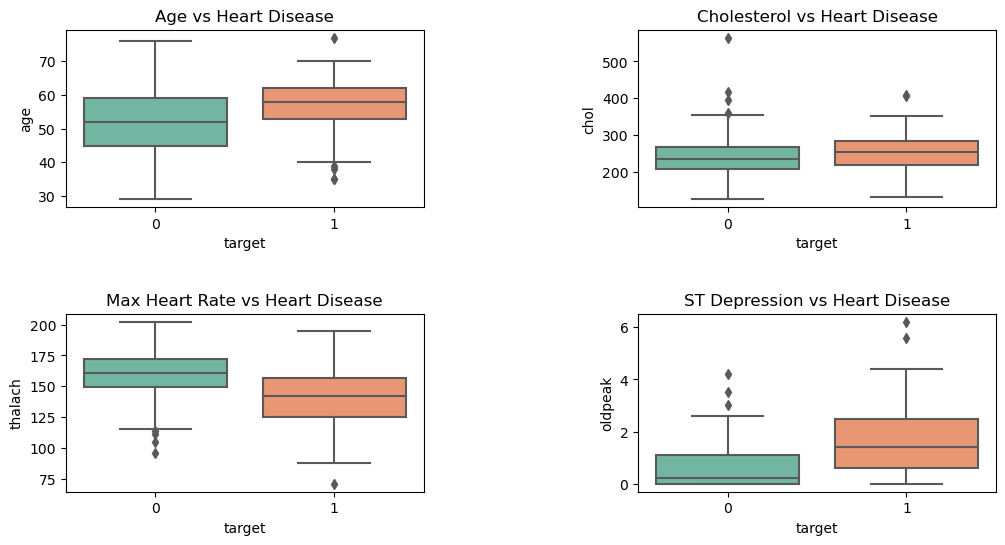

In [13]:
# 4. Feature Distributions: Heart Disease vs No Diseased

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.6, wspace=0.6)

# age comparison
plt.subplot(2, 2, 1)
sns.boxplot(x='target', y='age', data=df, palette='Set2')
plt.title('Age vs Heart Disease')

# cholesterol comparison
plt.subplot(2, 2, 2)
sns.boxplot(x='target', y='chol', data=df, palette='Set2')
plt.title('Cholesterol vs Heart Disease')

# max Heart Rate
plt.subplot(2, 2, 3)
sns.boxplot(x='target', y='thalach', data=df, palette='Set2')
plt.title('Max Heart Rate vs Heart Disease')

# ST Depression
plt.subplot(2, 2, 4)
sns.boxplot(x='target', y='oldpeak', data=df, palette='Set2')
plt.title('ST Depression vs Heart Disease')


### **Group Comparison: Heart Disease vs No Disease**

To better understand which factors differ between the two groups, we split the dataset by `target`:
- `0` → No heart disease  
- `1` → Heart disease present

**Average Comparison**

The `groupby('target').mean()` summary shows:
- Patients with **heart disease** tend to have higher `oldpeak`, `ca`, and `thal` values.
- Patients without disease generally have higher `thalach` (maximum heart rate achieved).

**Boxplot Insights**

- **Age:** Slightly older average age for heart disease patients.  
- **Cholesterol:** Similar distribution in both groups, not a strong differentiator.  
- **Max Heart Rate (`thalach`):** Significantly lower for patients with disease.  
- **ST Depression (`oldpeak`):** Clearly higher for patients with disease.

---

**Key takeaway:**  
`thalach`, `oldpeak`, `ca`, and `thal` continue to show the strongest visual separation between the two groups, confirming what the correlation analysis suggested. These features will likely carry the most predictive power in the model.


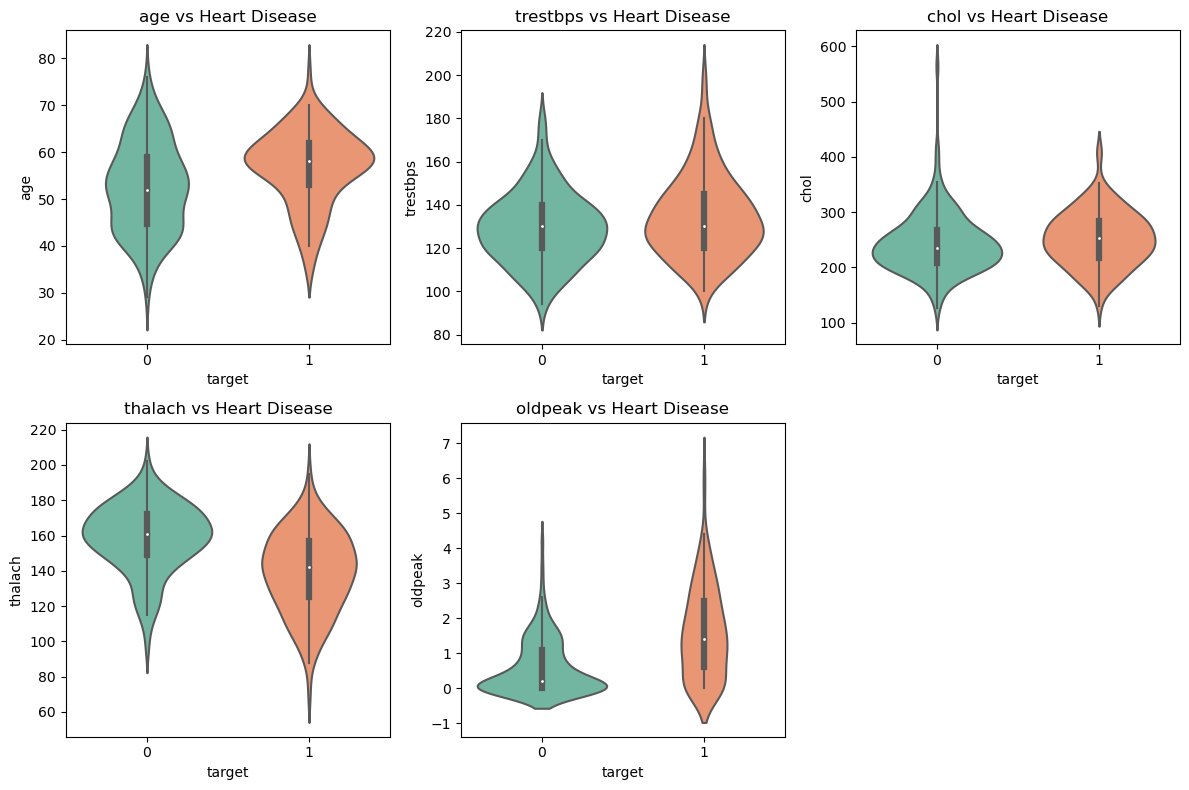

In [14]:
# 4. Feature Distributions: Heart Disease vs No Diseased
plt.figure(figsize=(12, 8))
cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='target', y=col, data=df, palette='Set2')
    plt.title(f'{col} vs Heart Disease')

plt.tight_layout()
plt.show()

###  **Feature Relationship Visualization**

To better visualize how key numeric features differ between patients **with** and **without heart disease**, we used pairplots and violin plots.

**Pairplots**
- Show scatter relationships between features.
- Clear separation observed for:
    - `thalach` (max heart rate) — lower for diseased patients.
    - `oldpeak` (ST depression) — higher for diseased patients.
- Features like `chol` and `trestbps` overlap heavily → weaker indicators.

**Violin Plots**
- Display both distribution and median differences.
- Confirms the strongest distinctions occur in:
    - `thalach`, `oldpeak`, and `ca`
- Age and cholesterol differences exist but are less pronounced.

---

**Insight Summary**
- Visual patterns consistently highlight `thalach`, `oldpeak`, `ca`, and `thal` as key predictive features.
- These findings reinforce prior correlation and group comparison results.
- Next step: prepare features for **scaling and model training**.

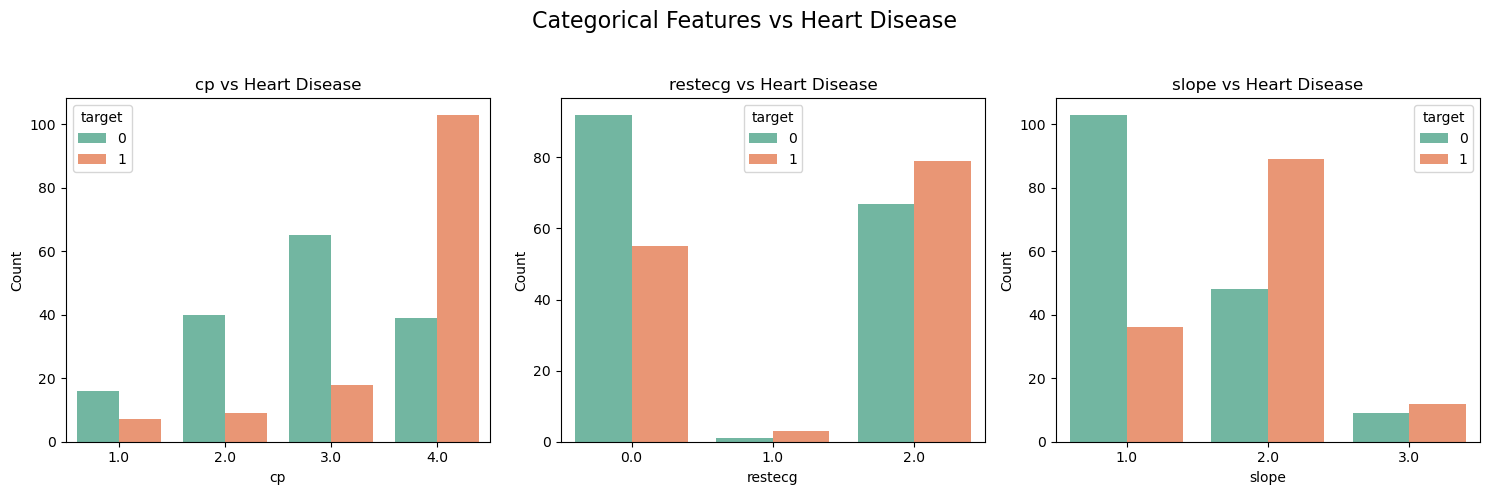

In [15]:
# 5. Visualize Categorical Features
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['cp', 'restecg', 'slope']
plt.figure(figsize=(15, 5))

for i, feature in enumerate(categorical_features):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=feature, hue='target', data=df, palette='Set2')
    plt.title(f'{feature} vs Heart Disease')
    plt.xlabel(feature)
    plt.ylabel('Count')
    

plt.suptitle('Categorical Features vs Heart Disease', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### **Categorical Feature Visualization**

We examined three key categorical features to see how their distributions differ between patients **with** and **without** heart disease.

1. Chest Pain Type (`cp`)
    - Higher heart disease rates occur for **cp = 4 (asymptomatic)** and **cp = 3 (non-anginal pain)**.
    - Lower rates for **cp = 1–2**, suggesting typical angina patterns may not always indicate disease.

2. Resting ECG Results (`restecg`)
    - Most patients show **normal (0)** or **ST-T abnormality (1)** results.
    - Slightly higher disease prevalence when `restecg = 2` (definite LV hypertrophy).

3. Slope of ST Segment (`slope`)
    - Disease is **much more common when slope = 2 (flat)**.
    - A **downsloping (3)** ST segment is also often associated with disease, while **upsloping (1)** is usually normal.

4. Exercise-Induced Angina (`exang`)
    - Individuals with **exang = 1 (chest pain during exercise)** show a much higher rate of heart disease.
    - Clinically, this makes sense: angina under physical stress often indicates restricted blood flow.
    - **exang** is a highly predictive binary feature that helps separate diseased vs. healthy groups.

5. Thalassemia Test Result (`thal`)
    - The **categories 3 (normal), 6 (fixed defect), and 7 (reversible defect)** show different risk levels.
    - Heart disease is significantly more common for **thal = 6 and thal = 7**, especially reversible defects.
    - **thal** has one of the strongest correlations with heart disease among all categorical features.

---

**These visualizations reinforce that:**
- Chest pain type, ECG abnormalities, ST-segment slope, exercise-induced angina, and thalassemia results are strong indicators of heart disease.
- Patterns are consistent with medical knowledge, reinforcing their importance in feature selection.
- Understanding these distributions helps guide modeling decisions and highlights which features carry predictive power.
- Combining categorical and numerical trends provides a fuller picture for feature importance before modeling.

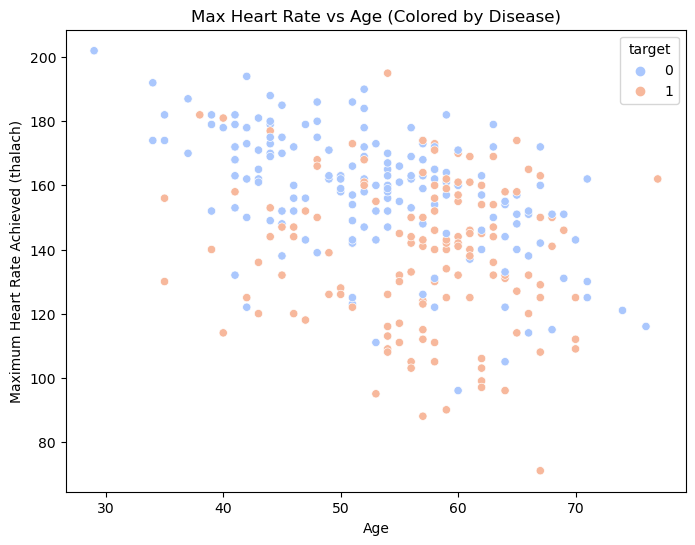

In [16]:
# 6. Check Relationships Between Continuous Variables
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='thalach', hue='target', data=df, palette='coolwarm')
plt.title('Max Heart Rate vs Age (Colored by Disease)')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved (thalach)')
plt.show()

### **Relationships Between Continuous Variables**

- The scatter plot shows that **maximum heart rate (`thalach`) generally decreases with age,** consistent with normal physiology.

- Patients without heart disease (target = 0) tend to have **higher max heart rates** for a given age, while those with heart disease (target = 1) show **lower max rates**.

- This suggests **older age and lower `thalach` values** often coincide with a higher chance of heart disease.

- The color separation indicates a **clear trend**, making age and thalach potentially useful predictors for classification models

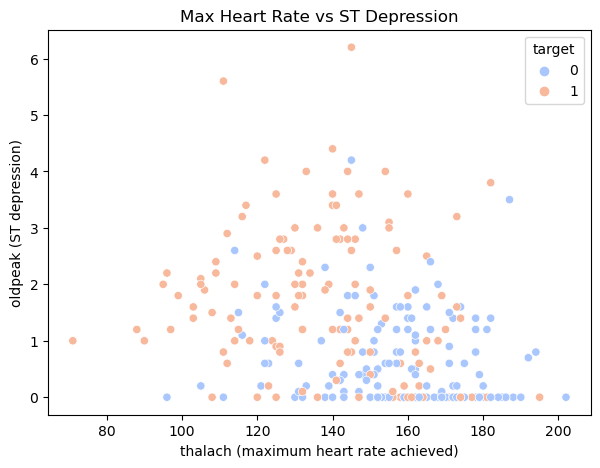

In [17]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='thalach', y='oldpeak', hue='target', data=df, palette='coolwarm')
plt.title('Max Heart Rate vs ST Depression')
plt.xlabel('thalach (maximum heart rate achieved)')
plt.ylabel('oldpeak (ST depression)')
plt.show()

- The scatter plot shows that **higher ST depression (`oldpeak`) values are strongly associated with heart disease,** while healthy patients mostly cluster at low oldpeak values (0–1).

- Patients **without heart disease (target = 0) tend to have higher maximum heart rates (`thalach`),** indicating better exercise capacity, while diseased patients often reach lower max heart rates.

- As **`oldpeak` increases** and **`thalach` decreases**, the likelihood of heart disease rises sharply, creating a noticeable separation in the plot.

- This relationship reflects clinical reality: **reduced exercise performance plus elevated ST depression are classic signs of restricted blood flow to the heart.**

- The clear clustering patterns suggest that `thalach` and `oldpeak` are highly informative predictors and will likely **improve model performance during classification.**

###  **Key Findings from Exploratory Data Analysis**

- **Strongly Correlated Features:**  
  - Higher `thalach` (maximum heart rate) is **negatively correlated** with heart disease — patients with higher heart rate capacity tend to have no disease.  
  - Higher `oldpeak`, `ca` (number of major vessels), and abnormal `thal` values are **positively correlated** with disease presence.  
  - Chest pain type (`cp`) and ST slope (`slope`) show clear categorical separation between target groups.

- **Categorical Patterns:**  
  - Males (`sex = 1`) and patients with exercise-induced angina (`exang = 1`) are more likely to have heart disease.  
  - Chest pain type `4` (asymptomatic) is the most common among patients with disease.

- **Outliers / Anomalies:**  
  - A few extreme cholesterol (`chol`) and resting blood pressure (`trestbps`) values exist, but are within medical plausibility.  
  - Outliers in `oldpeak` (values > 5) may be considered for clipping or transformation.

- **Next Steps Before Modeling:**  
  - Scale continuous features such as `age`, `trestbps`, `chol`, `thalach`, and `oldpeak`.  
  - Encode categorical variables (`cp`, `slope`, `thal`, `restecg`, etc.) using one-hot encoding.  
  - Split data into train/test sets and proceed to model building.

> ###  **Preprocessing Plan**
>
>
> #### 1. Handle Categorical Features via Encoding
> - Identify categorical features: `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `thal`.
> - Use **one-hot encoding** for features w/ > 2 categories: `cp`, `restecg`, `slope`, `thal`.
> - **Label encoding** for binary features
> - Required for Logistic Regression & SVM models
>
>
> #### 2. Feature Scaling
> - Scaling Technique:
>   - StandardScaler: mean = 0, std = 1.
> - Required fro Logistic Regression & SVM models.
>
>
> #### 3. Feature Selection
> - Helps reduce noise & improve model performance.
> - 2 Selection Techniques:
>   - Mutual Information (MI): measures how much knowing a feature reduces uncertainty about the target.
>       - Filter method
>   - Recursive Feature Elimination (RFE): A supervised method that removes least important features recursively.
>       - Wrapper method
>
> ---
>
> ####  **Summary**
> After this preprocessing, data will have gone through cleaning and feature engineering, preparing it for the appropriate models and testing. This dataset will then be trained in the second notebook on the following models:
> - Logistic Regression: Baseline Model (Error-based)
> - Decision Tree (Info-based)
> - Random Forest (Info-based)
> - Support Vector Machine (Error-based)

In [18]:
# 1. Handle Categorical Features via Encoding
# Cat features that need addressing: `cp`, `restecg`, `slope`, `thal`
categorical_cols = ['cp', 'restecg', 'slope', 'thal']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,...,False,False,False,True,False,False,True,False,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,1,...,True,False,False,True,False,True,False,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,...,True,False,False,True,False,True,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,False,True,False,False,False,False,True,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,False,False,False,True,True,False,False,True,False,False


In [19]:
# 2. Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

X = df_encoded.drop('target', axis=1)
y = df_encoded['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# sanity check
X_train.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
277,-1.741679,0.0,0.319284,-0.544213,0.0,0.151798,0.0,-0.915041,0.0,False,...,False,True,False,False,False,True,False,True,False,False
262,0.601114,0.0,0.985981,-0.161771,0.0,0.971399,0.0,-0.121634,0.0,True,...,False,True,False,False,True,False,False,True,False,False
30,1.605169,0.0,0.430400,-0.180893,0.0,0.108661,0.0,0.671774,2.0,True,...,False,True,False,False,True,False,False,True,False,False
22,0.377991,1.0,-0.680763,0.679601,0.0,0.496893,0.0,0.671774,0.0,False,...,False,False,False,True,False,True,False,True,False,False
281,-0.849186,1.0,-0.125182,0.086816,0.0,1.316494,0.0,-0.915041,0.0,False,...,False,True,False,False,True,False,False,True,False,False


,MI_score
ca,0.1648
cp_4.0,0.1444
thal_3.0,0.1319
thal_7.0,0.1145
exang,0.0946
oldpeak,0.0783
thalach,0.0718
slope_2.0,0.0612
slope_1.0,0.0443
cp_2.0,0.0339


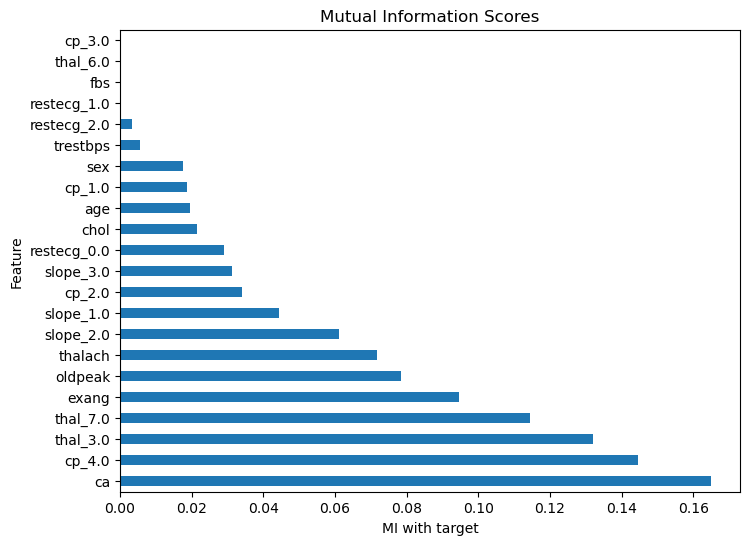

In [20]:
# 3. Feature Selection
# Mutual information
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

mi_scores_raw = mutual_info_classif(
    X_train, 
    y_train, 
    discrete_features=False,
    random_state=42
    )
mi_scores = pd.Series(mi_scores_raw, index=X_train.columns)
mi_series = pd.Series(mi_scores, index=X_train.columns).sort_values(ascending=False)

# Sort, round, and show as a table
mi_df = mi_scores.sort_values(ascending=False).round(4).to_frame("MI_score")
display(mi_df)

# Display as bar graph
mi_series.plot(kind='barh', figsize=(8,6), title="Mutual Information Scores")
plt.ylabel("Feature")
plt.xlabel("MI with target")
plt.show()


Top features: Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_0.0',
       'restecg_1.0', 'restecg_2.0', 'slope_1.0', 'slope_2.0', 'slope_3.0',
       'thal_3.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')
age            1
sex            1
trestbps       1
chol           1
fbs            1
thalach        1
exang          1
oldpeak        1
ca             1
cp_1.0         1
cp_2.0         1
cp_3.0         1
cp_4.0         1
restecg_0.0    1
restecg_1.0    1
restecg_2.0    1
slope_1.0      1
slope_2.0      1
slope_3.0      1
thal_3.0       1
thal_6.0       1
thal_7.0       1
Name: RFE_Rank, dtype: int64


,RFE_Rank,Coefficient,|Coefficient|
ca,1,1.122538,1.122538
sex,1,1.102004,1.102004
cp_3.0,1,-0.872810,0.872810
fbs,1,-0.699443,0.699443
thal_6.0,1,-0.686168,0.686168
slope_1.0,1,-0.677171,0.677171
cp_1.0,1,-0.663597,0.663597
thal_3.0,1,-0.653797,0.653797
exang,1,0.634088,0.634088
cp_4.0,1,0.575270,0.575270


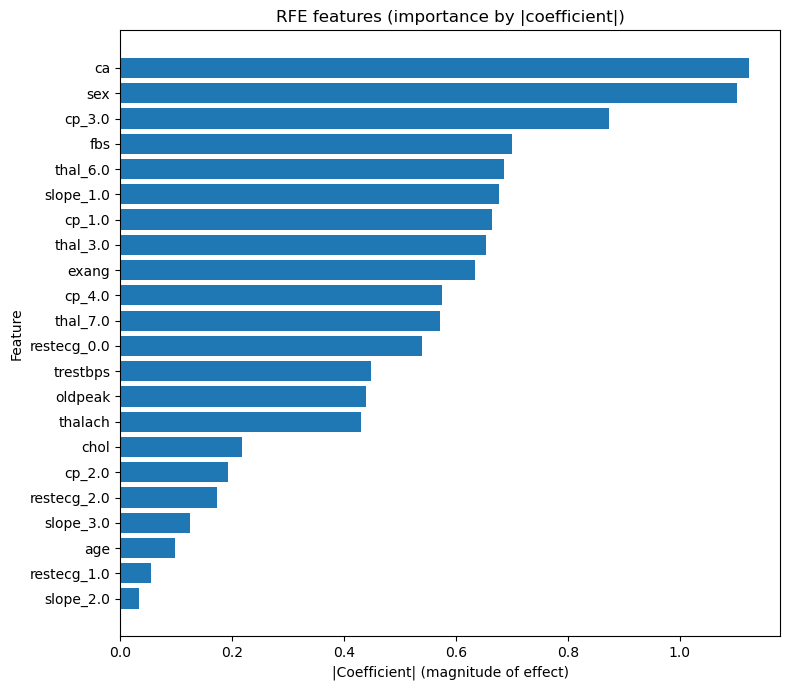

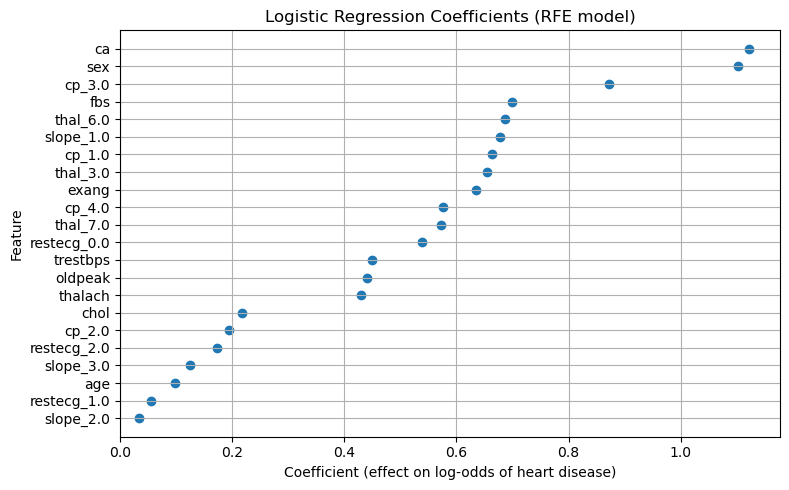

In [23]:
# 3. Feature Selection
# RFE; higher ranking = more influential
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

model = LogisticRegression(max_iter=1000, solver="liblinear")

# RFE: top 10 features
rfe = RFE(model, n_features_to_select=25)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("Top features:", selected_features)

# Ranking
ranking = pd.Series(rfe.ranking_, index=X.columns, name="RFE_Rank")
print(ranking)

# Get coefficients for selected features from the fitted estimator
# rfe.estimator_ is a LogisticRegression fitted on the selected features only
coef = pd.Series(0.0, index=X.columns, name="Coefficient")
coef[rfe.get_support()] = rfe.estimator_.coef_[0]

# Absolute coefficients for easier importance comparison
abs_coef = coef.abs().rename("|Coefficient|")

# Combine into one DataFrame
rfe_results = pd.concat([ranking, coef, abs_coef], axis=1)

# Sort: selected first, then by absolute coefficient (importance), then rank
rfe_results = rfe_results.sort_values(
    by=["|Coefficient|", "RFE_Rank"],
    ascending=[False, True]
)

display(rfe_results)

# Bar plot
selected = rfe_results.sort_values("|Coefficient|")

plt.figure(figsize=(8, 7))
plt.barh(selected.index, selected["|Coefficient|"])
plt.title("RFE features (importance by |coefficient|)")
plt.xlabel("|Coefficient| (magnitude of effect)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# Dot plot of coefficients 
coef_df = rfe_results.sort_values("|Coefficient|", ascending=True)

plt.figure(figsize=(8, 5))

plt.scatter(coef_df["|Coefficient|"], coef_df.index)

plt.title("Logistic Regression Coefficients (RFE model)")
plt.xlabel("Coefficient (effect on log-odds of heart disease)")
plt.ylabel("Feature")
plt.tight_layout()
plt.xlim(left=0)
plt.grid()
plt.show()



For feature selection, it is important that we consider features not simply based on their individual influence but also on their influence when combined with other variables. Since MI helps establish the individual impact and RFE considers relationships, **we consider both results when discussing feature selection.**

Analyzing the MI results, we can visually tell that `restecg_1.0`, `fbs`, `thal_6.0`, and `cp_3.0` have a score of close to 0. This means that they give essentially no additional information for the target. However, when we look at RFE's top 10 features, `fbs` and `cps_3.0` make the cut.

This leaves `restecg_1.0` and `thal_6.0`. However, dropping these features may cause future issues since they have been one-hot encoded. Dropping the one column is not preferred since it may prevent the gain of future knowledge and dropping the entire feature (`restecg` or `thal`) would take away plenty of useful information that our target needs to know.

**Therfore, we verified using feature selection that no additional features need to be dropped.** The features given in the raw dataset were already fairly shortened (14 in total), so this decision is appropriate.

In [24]:
# saving X_train and X_test
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)

# saving y_train and y_test
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

> ### **Dataset is cleaned, processed, split, and ready for modeling!**
> See Notebook 2 - modeling_nb.ipynb.